## Problem

The project aims at building a model of housing prices to predict median house values in California using the provided dataset.

#### Description of the columns

1. longitude (signed numeric - float) : Longitude value for the block in California, USA
2. latitude (numeric - float ) : Latitude value for the block in California, USA
3. housing_median_age (numeric - int ) : Median age of the house in the block
4. total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
5. total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
6. population (numeric - int ) : Count of the total number of population in the block
7. households (numeric - int ) : Count of the total number of households in the block
8. median_income (numeric - float ) : Median of the total household income of all the houses in the block
9. ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
10. median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

#### Main tasks

1. Load the data
2. Handle missing values
3. Encode caregorical data
4. Split the dataset
5. Standardize/Normalize data
6. Perform multiple linear regression
7. Analyse the received metrics
8. Feature engineering/Model tunning
9. Plots



## Imports and loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data/1553768847-housing.csv')

## Data preprocessing

### Quick overview

In [55]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [56]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.shape

(20640, 10)

In [6]:
# around 20k of house records

In [7]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# around 1% of missing data
# drop 207 blocks or write the mean value in total_bedrooms column  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
# mostly numerical data, but categorical feature ocean_proximity should be encoded to numerical

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# total_bedrooms mean value - 537.870553 might be soon replace null values

### Handling missing values

In [13]:
mean_total_bedrooms = data['total_bedrooms'].mean()
median_total_bedrooms = data['total_bedrooms'].median()

In [14]:
print(mean_total_bedrooms)
print(median_total_bedrooms)

537.8705525375618
435.0


In [15]:
value_to_repalce = np.mean([mean_total_bedrooms,median_total_bedrooms])

In [16]:
print(value_to_repalce)

486.4352762687809


In [17]:
data_without_na = data.copy()
data_without_na.fillna(value_to_repalce, inplace=True)

In [18]:
data_without_na.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## Visualising data

<Axes: xlabel='median_income', ylabel='Count'>

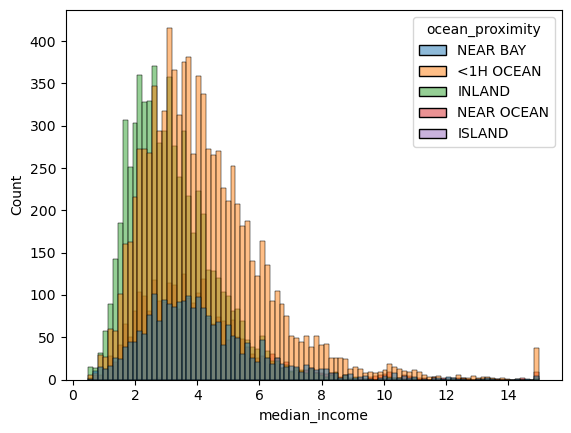

In [19]:
sns.histplot(data = data_without_na, x = 'median_income',hue='ocean_proximity')

<Axes: xlabel='median_income', ylabel='median_house_value'>

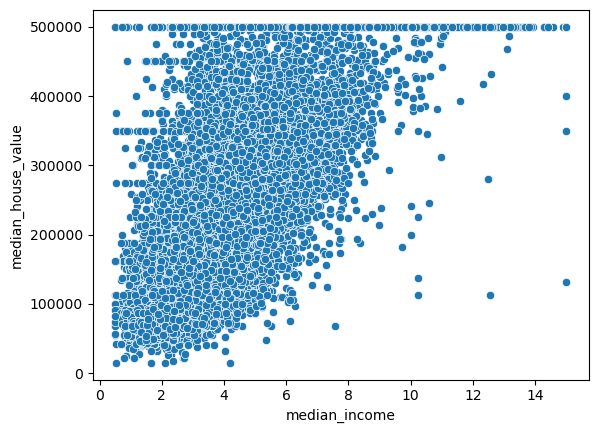

In [20]:
sns.scatterplot(data=data_without_na, x='median_income',y='median_house_value')


<Axes: xlabel='housing_median_age', ylabel='Count'>

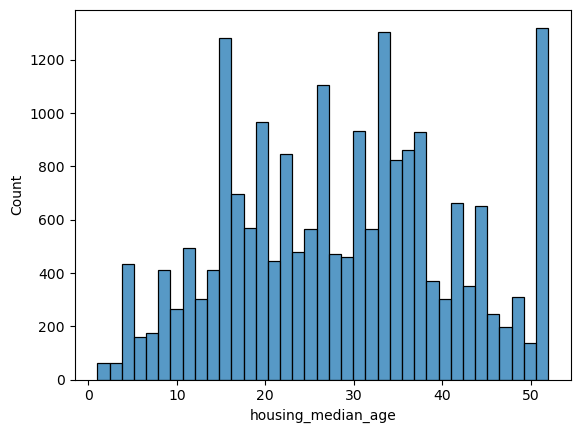

In [21]:
sns.histplot(data = data_without_na, x = 'housing_median_age')

<Axes: xlabel='longitude', ylabel='latitude'>

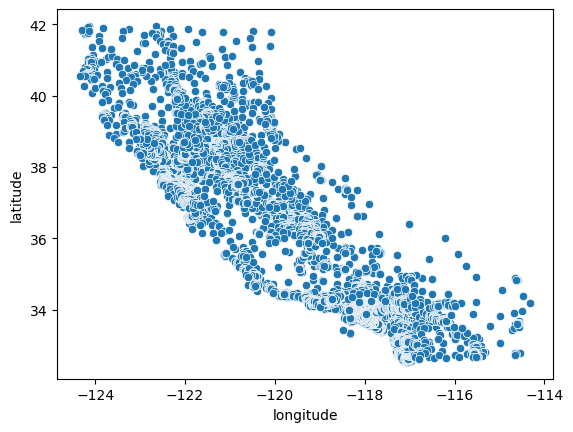

In [22]:
sns.scatterplot(data_without_na, x='longitude',y='latitude')


<Axes: xlabel='longitude', ylabel='latitude'>

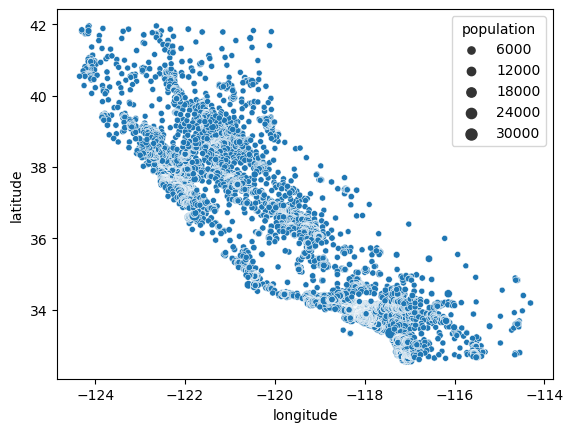

In [23]:
sns.scatterplot(data_without_na, x='longitude', y='latitude', size='population')

<Axes: xlabel='median_house_value', ylabel='Count'>

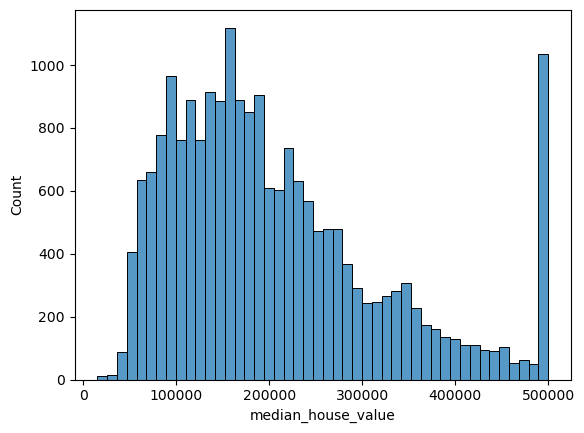

In [24]:
sns.histplot(data = data_without_na, x = 'median_house_value')

In [25]:
# distribution of price is right-skewed but with extreme values of houses which value 500,000 

## Check correlation between variables

In [26]:
# Select the columns (removed OP as it's a categorical column )
selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                     'total_bedrooms', 'population', 'households', 
                     'median_income','median_house_value']

# Create a subset DataFrame with the selected columns
selected_data = data_without_na[selected_columns]

# Calculate correlations
correlation_matrix = selected_data.corr()

correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069195,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066576,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319036,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927225,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069195,-0.066576,-0.319036,0.927225,1.000000,0.873787,0.974618,-0.007650,0.049459
population,0.099773,-0.108785,-0.296244,0.857126,0.873787,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974618,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007650,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049459,-0.024650,0.065843,0.688075,1.000000


In [27]:
np.round(data_without_na['median_house_value'].mean())

206856.0

In [28]:
# we can see that median_income has high corrleation with median_house_value( out target ). Also total_rooms, latitude and house_median_age have a high correlation, but not causation

<Axes: >

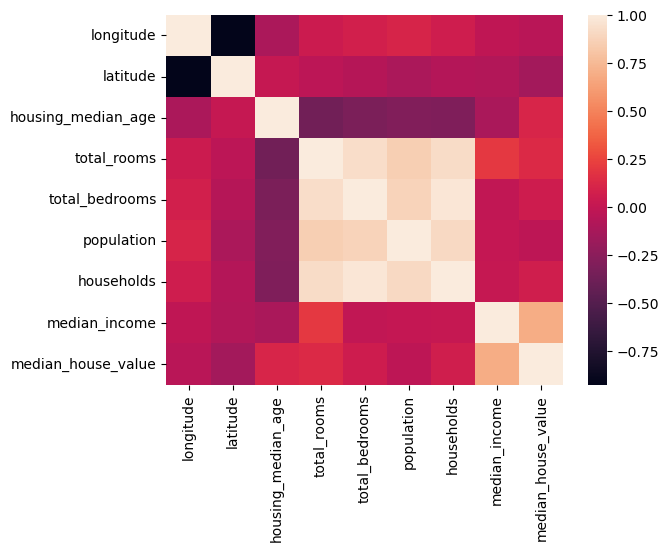

In [29]:
sns.heatmap(correlation_matrix)

## Encoding

In [30]:
data_without_na['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [31]:
# so it means we are going to have values from 0 to 4, which corresponds to each unique value

In [32]:
le = LabelEncoder()

data_without_na_encoded = data_without_na.copy()
data_without_na_encoded['ocean_proximity'] = le.fit_transform(data_without_na_encoded['ocean_proximity'])

In [33]:
data_without_na_encoded['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

## Split the dataset

In [34]:
data_without_na_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [35]:
data_without_na_encoded.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [36]:
# X features
X = data_without_na_encoded[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]

# y target variable
y = data_without_na_encoded['median_house_value']

In [37]:
X = np.array(X)
y = np.array(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Train MultipleLinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [40]:
print(y_pred)

[210817.28664741 279938.98173907 190523.31821801 ...  80664.46334828
 279949.7261337  207163.9010755 ]


In [41]:
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred,squared=False)

print("The mean squared erros is " + str(mse))

The mean squared erros is 69829.56668657181


## Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled.shape

(20640, 9)

In [45]:
# Train-Test Split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Training on a scaled data

### MultipleLinearRegression

In [46]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled,y_train)

# Make predictions on the test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [47]:
mse_scaled = mean_squared_error(y_test, y_pred_scaled,squared=False)
print("The mean squared erros is " + str(mse_scaled))

The mean squared erros is 71110.65428672313


In [ ]:
# plt.scatter(y_test,y_pred_scaled)

# sns.regplot(x=y_test, y=y_pred_scaled, scatter=False, color='red', label='Linear Regression')

# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# plt.title('Actul & Predicted values')

# plt.show()

### DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
predictions = regressor.predict(X_test_scaled)

In [50]:
mse = mean_squared_error(y_test, predictions,squared=False)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 67931.31325278009


### RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [52]:
predictions = rf_model.predict(X_test_scaled)

In [53]:
mse = mean_squared_error(y_test, predictions,squared=False)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 50259.92548265171
